In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [2]:
file = r'C:\Users\Gouth_000\NYC_Jobs.csv'
df = pd.read_csv(file)

In [3]:
df.head(20)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,,,...,"Salary range for this position is: $42,405 - $...",,,,NaN,New York City residency is generally required ...,2011-06-24T00:00:00,NaN,2011-06-24T00:00:00,2018-07-31T00:00:00
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,,F,...,,"In addition to applying through this website, ...",,,NaN,New York City residency is generally required ...,2012-01-26T00:00:00,NaN,2012-01-26T00:00:00,2018-07-31T00:00:00
2,102221,DEPT OF ENVIRONMENT PROTECTION,External,1,Project Specialist,ENVIRONMENTAL ENGINEERING INTE,20616,0,,F,...,Appointments are subject to OMB approval,click the apply now button,35 hours per week/day,,NaN,New York City Residency is not required for th...,2012-06-21T00:00:00,NaN,2012-09-07T00:00:00,2018-07-31T00:00:00
3,102221,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Project Specialist,ENVIRONMENTAL ENGINEERING INTE,20616,0,,F,...,Appointments are subject to OMB approval,click the apply now button,35 hours per week/day,,NaN,New York City Residency is not required for th...,2012-06-21T00:00:00,NaN,2012-09-07T00:00:00,2018-07-31T00:00:00
4,114352,DEPT OF ENVIRONMENT PROTECTION,Internal,5,Deputy Plant Chief,SENIOR STATIONARY ENGINEER (EL,91639,0,,F,...,Appointments are subject to OMB approval Fo...,"Click ""Apply Now"" button",40 per week / day,Various,NaN,New York City residency is generally required ...,2012-12-12T00:00:00,NaN,2012-12-13T00:00:00,2018-07-31T00:00:00
5,117261,DEPT OF ENVIRONMENT PROTECTION,Internal,1,CIVIL ENGINEERING INTERN,CIVIL ENGINEERING INTERN,20202,0,,F,...,Appointments are subject to OMB approval. For ...,"Click the ""APPLY NOW"" button.",35 hrs week/day shift,59-17 Junction Blvd Corona Ny,NaN,New York City Residency is not required for th...,2013-02-20T00:00:00,NaN,2013-02-25T00:00:00,2018-07-31T00:00:00
6,117261,DEPT OF ENVIRONMENT PROTECTION,External,1,CIVIL ENGINEERING INTERN,CIVIL ENGINEERING INTERN,20202,0,,F,...,Appointments are subject to OMB approval. For ...,"Click the ""APPLY NOW"" button.",35 hrs week/day shift,59-17 Junction Blvd Corona Ny,NaN,New York City Residency is not required for th...,2013-02-20T00:00:00,NaN,2013-02-25T00:00:00,2018-07-31T00:00:00
7,120749,DEPT OF ENVIRONMENT PROTECTION,External,1,"Director, Strategic Sourcing",ADMINISTRATIVE PROJECT MANAGER,83008,M2,"Finance, Accounting, & Procurement",F,...,,"Click the ""APPLY NOW"" button.",35 Hours per Week/Day,"59-17 Junction Blouvard, Flushing NY",NaN,New York City Residency is not required for th...,2013-05-24T00:00:00,NaN,2013-05-24T00:00:00,2018-07-31T00:00:00
8,120749,DEPT OF ENVIRONMENT PROTECTION,Internal,1,"Director, Strategic Sourcing",ADMINISTRATIVE PROJECT MANAGER,83008,M2,"Finance, Accounting, & Procurement",F,...,,"Click the ""APPLY NOW"" button.",35 Hours per Week/Day,"59-17 Junction Blouvard, Flushing NY",NaN,New York City Residency is not required for th...,2013-05-24T00:00:00,NaN,2013-05-24T00:00:00,2018-07-31T00:00:00
9,307215,NYC EMPLOYEES RETIREMENT SYS,External,1,COMPUTER SPECIALIST (SOFTWARE),COMPUTER SPECIALIST (SOFTWARE),13632,2,"Technology, Data & Innovation",,...,,Please click the apply button and submit your ...,,,NaN,New York City Residency is not required for th...,2017-09-27T00:00:00,NaN,2017-09-27T00:00:00,2018-07-31T00:00:00


In [4]:
df.shape

(3465, 28)

In [5]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

In [6]:
# Various departments 
pd.Series(df.Agency.unique())

0       DEPARTMENT OF BUSINESS SERV.
1     DEPT OF ENVIRONMENT PROTECTION
2       NYC EMPLOYEES RETIREMENT SYS
3                     LAW DEPARTMENT
4              NYC HOUSING AUTHORITY
5      DEPT OF HEALTH/MENTAL HYGIENE
6       DEPT OF INFO TECH & TELECOMM
7     OFFICE OF COLLECTIVE BARGAININ
8          ADMIN FOR CHILDREN'S SVCS
9       DEPARTMENT OF TRANSPORTATION
10       DEPARTMENT OF INVESTIGATION
11                 POLICE DEPARTMENT
12       HRA/DEPT OF SOCIAL SERVICES
13     DEPT OF DESIGN & CONSTRUCTION
14                   FIRE DEPARTMENT
15    DISTRICT ATTORNEY RICHMOND COU
16             DEPARTMENT OF FINANCE
17         OFFICE OF THE COMPTROLLER
18        DEPT OF PARKS & RECREATION
19       LANDMARKS PRESERVATION COMM
20      CIVILIAN COMPLAINT REVIEW BD
21       DEPARTMENT OF CITY PLANNING
22          DEPARTMENT OF CORRECTION
23                    TAX COMMISSION
24           DEPARTMENT OF PROBATION
25       TAXI & LIMOUSINE COMMISSION
26           HUMAN RIGHTS COMMISSION
2

In [7]:
# Let's study the number of jobs in each department 
# We'll need to group by department and then aggregate the count 
df_jobs_group = df.groupby('Agency')['# Of Positions'].agg('sum')

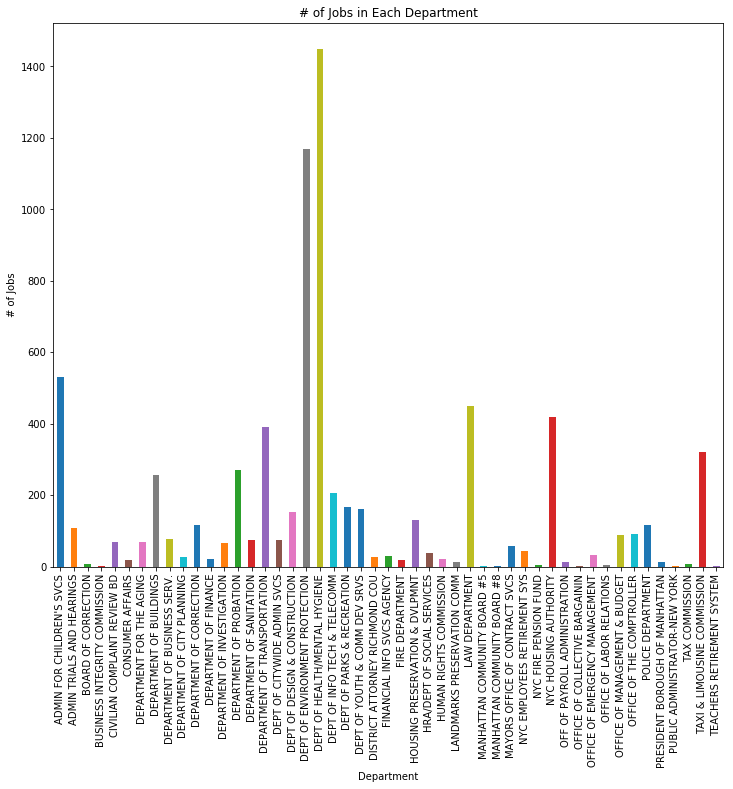

In [8]:
plt.figure(figsize=(12,10))
df_jobs_group.plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('# of Jobs')
plt.title('# of Jobs in Each Department')
plt.show()

It looks like department of health and mental hygiene needs a lot of jobs. Why is that? Let's study the type of roles that are offered. Let's sort that list and see the descending order. Then I am going to look for key words that keep recurring in their job title and get the term frequency of each. 

In [9]:
df_jobs_group.sort_values(ascending=False)

Agency
DEPT OF HEALTH/MENTAL HYGIENE     1449
DEPT OF ENVIRONMENT PROTECTION    1170
ADMIN FOR CHILDREN'S SVCS          531
LAW DEPARTMENT                     449
NYC HOUSING AUTHORITY              418
DEPARTMENT OF TRANSPORTATION       390
TAXI & LIMOUSINE COMMISSION        322
DEPARTMENT OF PROBATION            270
DEPARTMENT OF BUILDINGS            257
DEPT OF INFO TECH & TELECOMM       207
DEPT OF PARKS & RECREATION         166
DEPT OF YOUTH & COMM DEV SRVS      160
DEPT OF DESIGN & CONSTRUCTION      152
HOUSING PRESERVATION & DVLPMNT     131
POLICE DEPARTMENT                  117
DEPARTMENT OF CORRECTION           116
ADMIN TRIALS AND HEARINGS          107
OFFICE OF THE COMPTROLLER           91
OFFICE OF MANAGEMENT & BUDGET       88
DEPARTMENT OF BUSINESS SERV.        78
DEPARTMENT OF SANITATION            74
DEPT OF CITYWIDE ADMIN SVCS         74
DEPARTMENT FOR THE AGING            70
CIVILIAN COMPLAINT REVIEW BD        68
DEPARTMENT OF INVESTIGATION         67
MAYORS OFFICE OF C

In [50]:
# Let's first study the jobs in the health department
df_health = df[df.Agency == 'DEPT OF HEALTH/MENTAL HYGIENE']['Business Title']

In [15]:
df_health.count()

802

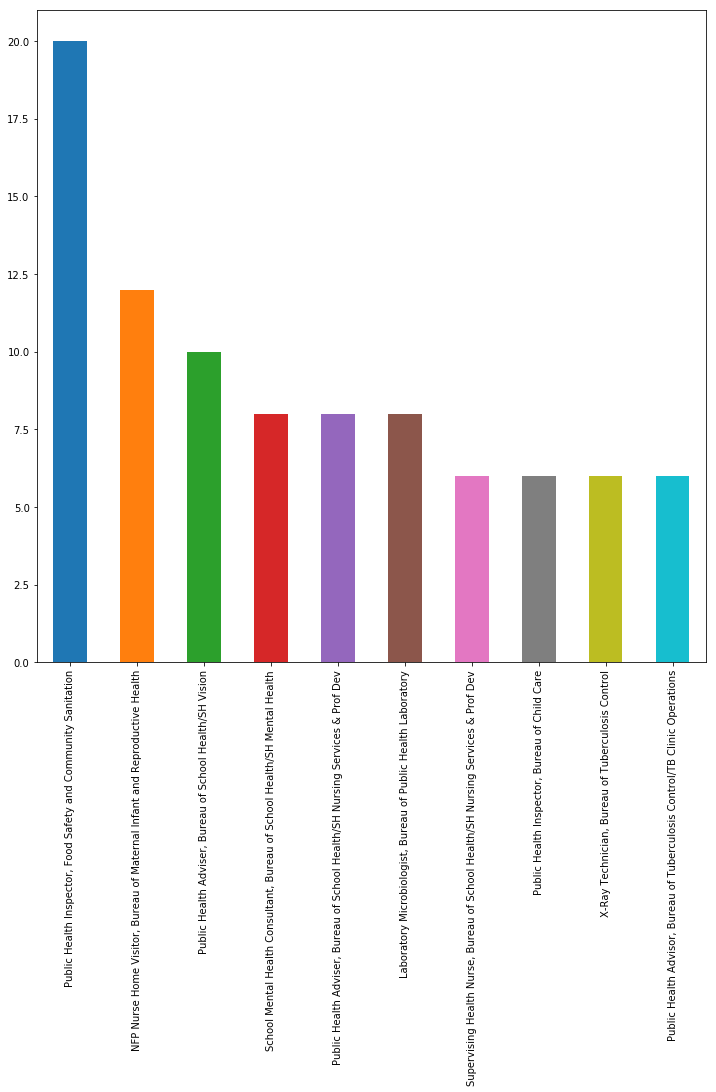

In [26]:
#Let's get the count of the all the jobs in this department 
plt.figure(figsize=(12,12)) 
top_jobs = df_health.value_counts()[:10].plot.bar()  
plt.show()

In [74]:
# Let's study the number of jobs needed by each bureau in department of health and hygiene 
# We will need the text by the comma  
words=df_health.apply(lambda x:re.split(',|/',x))  

In [83]:
all_bureaus = [items for row in words for items in row if 'Bureau' in items]

In [90]:
Counter(all_bureaus).most_common(5)

[(' Bureau of School Health', 101),
 (' Bureau of Tuberculosis Control', 34),
 (' Bureau of Maternal Infant and Reproductive Health', 28),
 (' Bureau of Mental Health', 26),
 (' Bureau of HIV', 22)]

Wow, it looks like school health needs the most help with 101 jobs that are vacant.